In [26]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

sys.path.append("..")
pd.set_option("display.max_columns", None)

In [4]:
DATA_PATH = os.path.join("..", "data", "field_players.csv")

In [5]:
players = pd.read_csv(DATA_PATH)

In [9]:
players

,first_name,player_id,price,PPG,last_name,TSB%,PTS,player_name,MP,GS,A,CS,GC,OG,PM,YC,RC,B,BPS,I,C,T,II,Starts,xG,xA,xGI,xGC,xG90,xA90,xGI90,xGC90,GC90,position,team
0,Gabriel,2,6.8,0.6,Fernando de Jesus,0.9,5,G.Jesus,112,0,0,0,2,0,0,3,0,0,27,17.0,35.2,64.0,11.5,1,0.67,0.07,0.74,1.33,0.54,0.06,0.60,1.07,1.61,Forward,Arsenal
1,Gabriel,3,6.2,4.3,dos Santos Magalhães,22.3,43,Gabriel,863,2,0,3,10,0,0,1,0,4,152,238.4,52.7,172.0,46.3,10,1.49,0.25,1.74,10.19,0.16,0.03,0.19,1.06,1.04,Defender,Arsenal
2,Kai,4,8.1,4.5,Havertz,13.9,45,Havertz,900,4,1,3,11,0,0,1,0,7,167,222.8,124.2,357.0,70.4,10,4.50,1.11,5.61,10.65,0.45,0.11,0.56,1.06,1.10,Forward,Arsenal
3,Jurriën,6,5.5,2.8,Timber,1.3,22,J.Timber,593,0,1,2,6,0,0,3,0,0,86,105.4,125.6,41.0,27.0,7,0.32,0.30,0.62,6.58,0.05,0.05,0.10,1.00,0.91,Defender,Arsenal
4,Jorge Luiz,7,4.8,1.3,Frello Filho,0.2,4,Jorginho,154,0,0,1,1,0,0,2,0,0,16,4.4,21.6,1.0,2.7,2,0.04,0.15,0.19,1.10,0.02,0.09,0.11,0.64,0.58,Midfielder,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Pablo,565,5.1,1.2,Sarabia,0.1,4,Sarabia,134,0,0,0,3,0,0,1,0,0,19,28.0,50.1,59.0,13.7,1,0.46,0.40,0.86,1.78,0.31,0.27,0.58,1.20,2.01,Midfielder,Wolves
417,Jørgen,566,5.6,4.3,Strand Larsen,2.6,43,Strand Larsen,823,4,1,1,23,0,0,1,0,5,180,201.4,91.6,237.0,52.7,10,2.48,0.45,2.93,16.23,0.27,0.05,0.32,1.77,2.52,Forward,Wolves
418,Toti António,567,4.3,0.8,Gomes,0.2,6,Toti,647,0,1,0,20,0,0,4,0,0,17,120.2,18.1,15.0,15.3,8,0.01,0.26,0.27,14.50,0.00,0.04,0.04,2.02,2.78,Defender,Wolves
419,André,642,5.0,1.1,Trindade da Costa Neto,0.0,8,André,362,0,0,0,11,0,0,2,0,0,67,57.0,40.1,12.0,10.9,5,0.07,0.04,0.11,8.21,0.02,0.01,0.03,2.04,2.73,Midfielder,Wolves


In [17]:
players[["player_name", "B", "team"]]

,player_name,B,team
0,G.Jesus,0,Arsenal
1,Gabriel,4,Arsenal
2,Havertz,7,Arsenal
3,J.Timber,0,Arsenal
4,Jorginho,0,Arsenal
...,...,...,...
416,Sarabia,0,Wolves
417,Strand Larsen,5,Wolves
418,Toti,0,Wolves
419,André,0,Wolves


In [22]:
fig = px.bar(
    players.sort_values("B", ascending=False).head(40),
    x="player_name",
    y="B",
    color="team",
)
fig.show()

/Users/mumin/Desktop/DS/personal/fpl/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
cards = players.sort_values(["YC", "RC"], ascending=[False, False]).loc[
    :, ["player_name", "YC", "RC", "team"]
]
cards = cards[cards["YC"] != 0]

In [ ]:
fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["team", "player name", "Yellow cards", "Red cards"],
                fill_color="paleturquoise",
                align="left",
            ),
            cells=dict(
                values=[cards.team, cards.player_name, cards.YC, cards.RC],
                fill_color="lavender",
                align="left",
            ),
        )
    ]
)

fig.show()

In [16]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF"  # I usually just like to do a white background
text_color = "#000000"  # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [ ]:
foul_cards = cards[cards["YC"] > 2].reset_index().drop(columns="index")

In [116]:
foul_cards

,player_name,YC,RC,team
index,,,,
0,W.Fofana,6,0,Chelsea
1,Cucurella,5,0,Chelsea
2,Hughes,5,0,Crystal Palace
3,Schär,4,1,Newcastle
4,Christie,4,0,Bournemouth
...,...,...,...,...
61,Emerson,3,0,West Ham
62,Kilman,3,0,West Ham
63,Souček,3,0,West Ham


In [ ]:
foul_cards["rank"] = [i for i in range(1, len(foul_cards) + 1)]

In [ ]:
cols_defs = [
    ColumnDefinition(name="rank", textprops={"ha": "left"}, width=0.5),
    ColumnDefinition(name="team", textprops={"ha": "left"}, width=0.5),
    ColumnDefinition(
        name="player_name", textprops={"ha": "left", "weight": "bold"}, width=0.5
    ),
    ColumnDefinition(name="YC", textprops={"ha": "center"}, width=0.5),
    ColumnDefinition(name="RC", textprops={"ha": "center"}, width=0.5),
]

In [133]:
cards.iloc[2:24]

,player_name,YC,RC,team
index,,,,
135,Hughes,5,0,Crystal Palace
306,Schär,4,1,Newcastle
43,Christie,4,0,Bournemouth
48,Kluivert,4,0,Bournemouth
52,Semenyo,4,0,Bournemouth
118,N.Jackson,4,0,Chelsea
140,Muñoz,4,0,Crystal Palace
156,Keane,4,0,Everton
177,Lukić,4,0,Fulham


/var/folders/16/y_6l6_j5485_px571d85flf40000gn/T/ipykernel_27471/1714251264.py:21: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



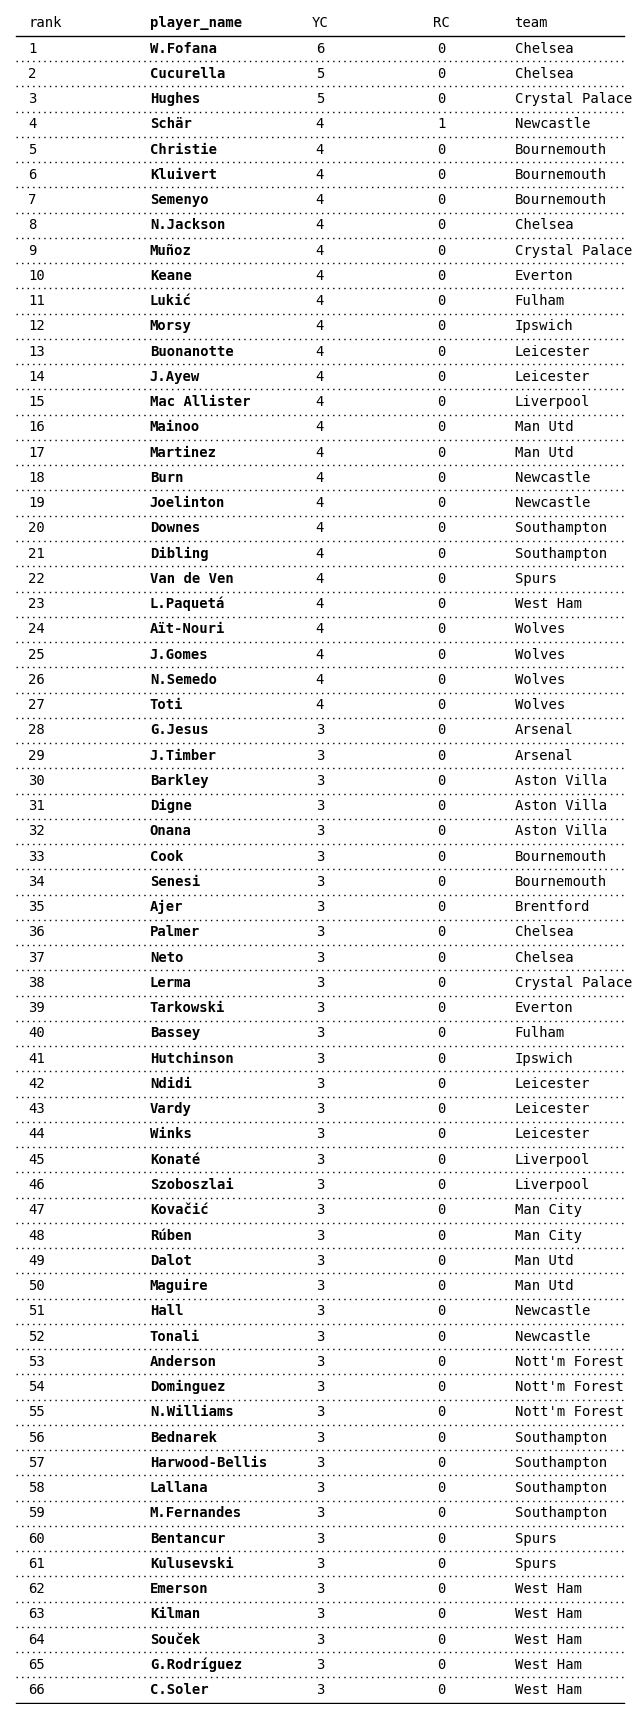

In [ ]:
fig, ax = plt.subplots(figsize=(8, 22))

fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    foul_cards,
    column_definitions=cols_defs,
    index_col="rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 3))},
    footer_divider=True,
    textprops={"fontsize": 10},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
)

table.cells[10, 3].textprops["color"] = "#8ACB88"

fig.show()

In [ ]:
fig = px.scatter(
    players.sort_values("GS", ascending=False).head(50),
    x="xG",
    y="GS",
    color="team",
    trendline="ols",
    trendline_scope="overall",
    hover_name="player_name",
    size="xG",
    title="Отношение голов к ожидаемым голам",
)
fig.show()

/Users/mumin/Desktop/DS/personal/fpl/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
fig = px.scatter(
    players.sort_values("A", ascending=False).head(50),
    x="xA",
    y="A",
    color="team",
    trendline="ols",
    trendline_scope="overall",
    hover_name="player_name",
    size="xA",
    title="Отношение ассистов к ожидаемым ассистам",
)
fig.show()

/Users/mumin/Desktop/DS/personal/fpl/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
fig = px.scatter(
    players.sort_values("xGI", ascending=False).head(50),
    x="xGI",
    y="xGI90",
    color="team",
    trendline="ols",
    trendline_scope="overall",
    hover_name="player_name",
    size="xGI",
    title="Отношение ассистов к ожидаемым ассистам",
)
fig.show()

/Users/mumin/Desktop/DS/personal/fpl/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [68]:
players.columns

Index(['first_name', 'player_id', 'price', 'PPG', 'last_name', 'TSB%', 'PTS',
       'player_name', 'MP', 'GS', 'A', 'CS', 'GC', 'OG', 'PM', 'YC', 'RC', 'B',
       'BPS', 'I', 'C', 'T', 'II', 'Starts', 'xG', 'xA', 'xGI', 'xGC', 'xG90',
       'xA90', 'xGI90', 'xGC90', 'GC90', 'position', 'team'],
      dtype='object')

## Team stats

In [4]:
team_df = pd.read_csv("../data/pl_team_stats.csv", skiprows=1)

In [ ]:
team_df["badges"] = team_df["Squad"].apply(
    lambda x: f"/Users/mumin/Desktop/DS/personal/fpl/logos/{x.lower()}_logo.png"
)

In [18]:
team_df.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'badges'],
      dtype='object')

In [ ]:
team_df_cols = [
    "badges",
    "Squad",
    "Gls",
    "Ast",
    "G+A",
    "G-PK",
    "PK",
    "PKatt",
    "CrdY",
    "CrdR",
    "xG",
    "npxG",
    "xAG",
    "npxG+xAG",
]

In [48]:
shorten_team_df = team_df.copy()[team_df_cols].reset_index().drop(columns="index")

In [49]:
shorten_team_df["rank"] = [i for i in range(1, len(shorten_team_df) + 1)]

In [77]:
cols_defs = [
    ColumnDefinition(name="rank", textprops={"ha": "left", "va": "center"}, width=0.5),
    ColumnDefinition(
        name="badges",
        textprops={"ha": "left", "va": "center", "color": bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(name="Squad", textprops={"ha": "right"}),
    ColumnDefinition(
        name="Gls", group="Performance", textprops={"ha": "right"}, width=0.5
    ),
    ColumnDefinition(
        name="Ast", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="G+A", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="G-PK", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="PK", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="PKatt", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="CrdY", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="CrdR", group="Performance", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="xG",
        group="Expected",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(shorten_team_df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2),
    ),
    ColumnDefinition(
        name="npxG",
        group="Expected",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(shorten_team_df["npxG"], cmap=matplotlib.cm.PiYG, num_stds=2),
    ),
    ColumnDefinition(
        name="xAG",
        group="Expected",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(shorten_team_df["xAG"], cmap=matplotlib.cm.PiYG, num_stds=2),
    ),
    ColumnDefinition(
        name="npxG+xAG",
        group="Expected",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(
            shorten_team_df["npxG+xAG"], cmap=matplotlib.cm.PiYG, num_stds=2
        ),
    ),
]

/var/folders/16/y_6l6_j5485_px571d85flf40000gn/T/ipykernel_43973/2702917819.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


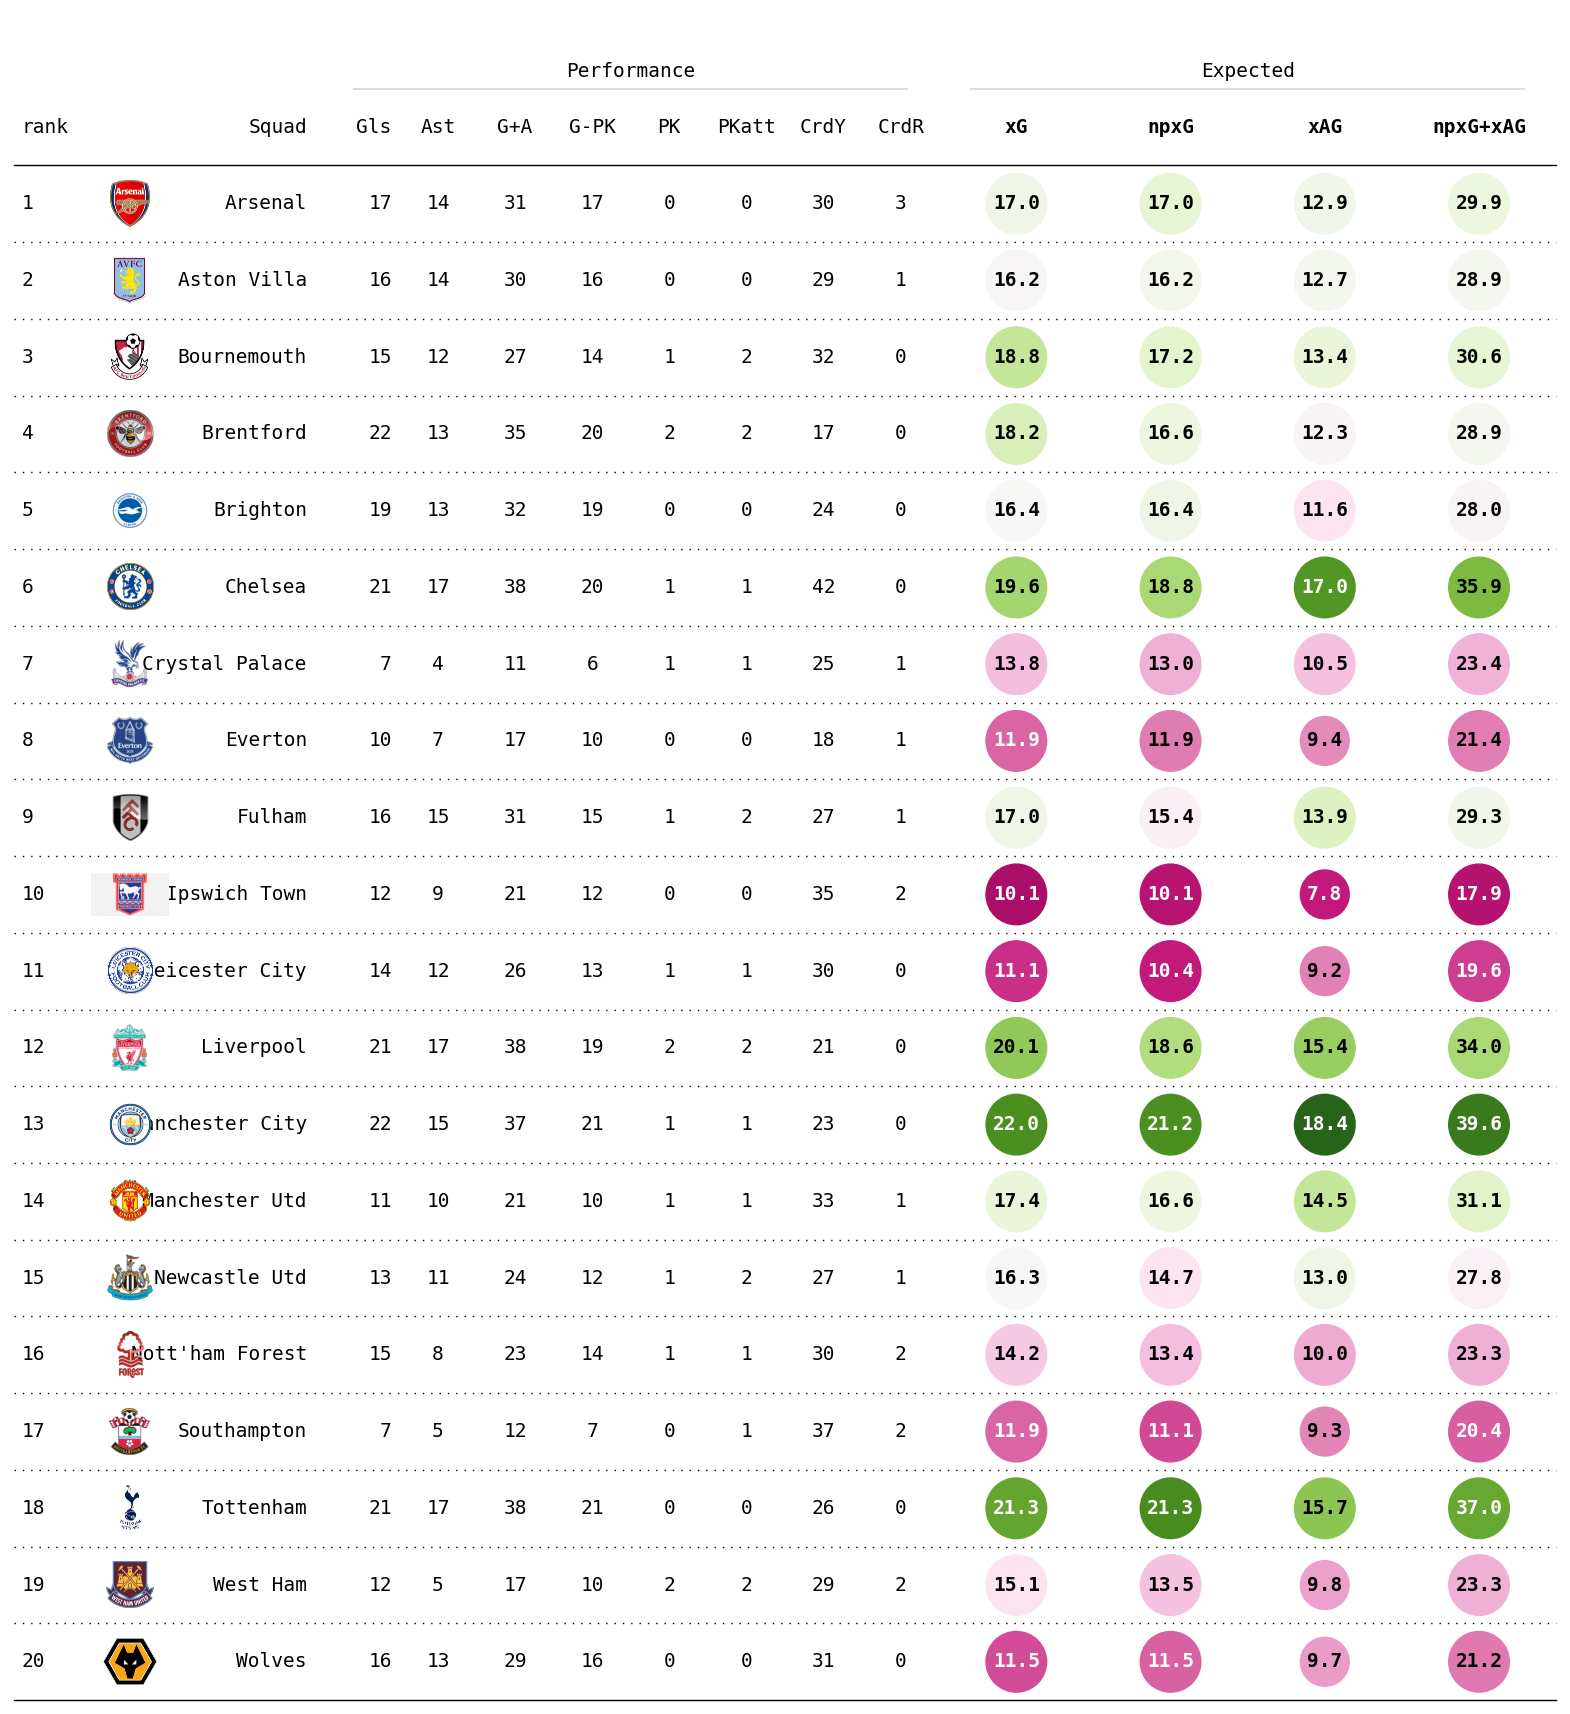

In [78]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    shorten_team_df,
    column_definitions=cols_defs,
    index_col="rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(
    colnames=["xG", "npxG", "xAG", "npxG+xAG"]
)  # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"
# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

# for idx in [0, 1, 2, 3]:
#     table.rows[idx].set_facecolor(row_colors["top4"])
#
# for idx in [4, 5]:
#     table.rows[idx].set_facecolor(row_colors["top6"])
#
#
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])


fig.show()

### Table

In [104]:
table_df = pd.read_csv("/Users/mumin/Desktop/DS/personal/fpl/data/pl_table.csv")

table_df["badges"] = table_df["Squad"].apply(
    lambda x: f"/Users/mumin/Desktop/DS/personal/fpl/logos/{x.lower()}_logo.png"
)

In [105]:
shorten_table_df = table_df.copy().loc[
    :,
    [
        "Rk",
        "badges",
        "Squad",
        "MP",
        "W",
        "D",
        "L",
        "GF",
        "GA",
        "GD",
        "Pts",
        "Pts/MP",
        "xG",
        "xGA",
        "xGD",
        "xGD/90",
        "Last 5",
    ],
]

In [106]:
shorten_table_df.head(1)

,Rk,badges,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5
0,1,/Users/mumin/Desktop/DS/personal/fpl/logos/liv...,Liverpool,11,9,1,1,21,6,15,28,2.55,20.1,9.3,10.8,0.98,W W D W W


In [119]:
cols_defs = [
    ColumnDefinition(name="Rk", textprops={"ha": "left", "va": "center"}, width=0.5),
    ColumnDefinition(
        name="badges",
        textprops={"ha": "left", "va": "center", "color": bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad", textprops={"ha": "right", "weight": "bold"}, width=1.75
    ),
    ColumnDefinition(
        name="MP", group="Matches played", textprops={"ha": "right"}, width=0.5
    ),
    ColumnDefinition(
        name="W", group="Matches played", textprops={"ha": "right"}, width=0.5
    ),
    ColumnDefinition(
        name="D", group="Matches played", textprops={"ha": "right"}, width=0.5
    ),
    ColumnDefinition(
        name="L", group="Matches played", textprops={"ha": "right"}, width=0.5
    ),
    ColumnDefinition(name="GF", group="Goals", textprops={"ha": "right"}, width=0.5),
    ColumnDefinition(name="GA", group="Goals", textprops={"ha": "center"}, width=0.5),
    ColumnDefinition(name="GD", group="Goals", textprops={"ha": "center"}, width=0.5),
    ColumnDefinition(name="Pts", group="Points", textprops={"ha": "center"}, width=0.5),
    ColumnDefinition(
        name="Pts/MP", group="Points", textprops={"ha": "center"}, width=0.5
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(shorten_table_df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2),
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(
            shorten_table_df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2
        ),
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(shorten_table_df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2),
    ),
    ColumnDefinition(
        name="xGD/90",
        group="Expected Goals",
        textprops={
            "ha": "center",
            "color": "#000000",
            "weight": "bold",
            "bbox": {"boxstyle": "circle", "pad": 0.35},
        },
        cmap=normed_cmap(
            shorten_table_df["xGD/90"], cmap=matplotlib.cm.PiYG, num_stds=2
        ),
    ),
    ColumnDefinition(name="Last 5", group="Form", textprops={"ha": "center"}),
]

/var/folders/16/y_6l6_j5485_px571d85flf40000gn/T/ipykernel_43973/1847079329.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


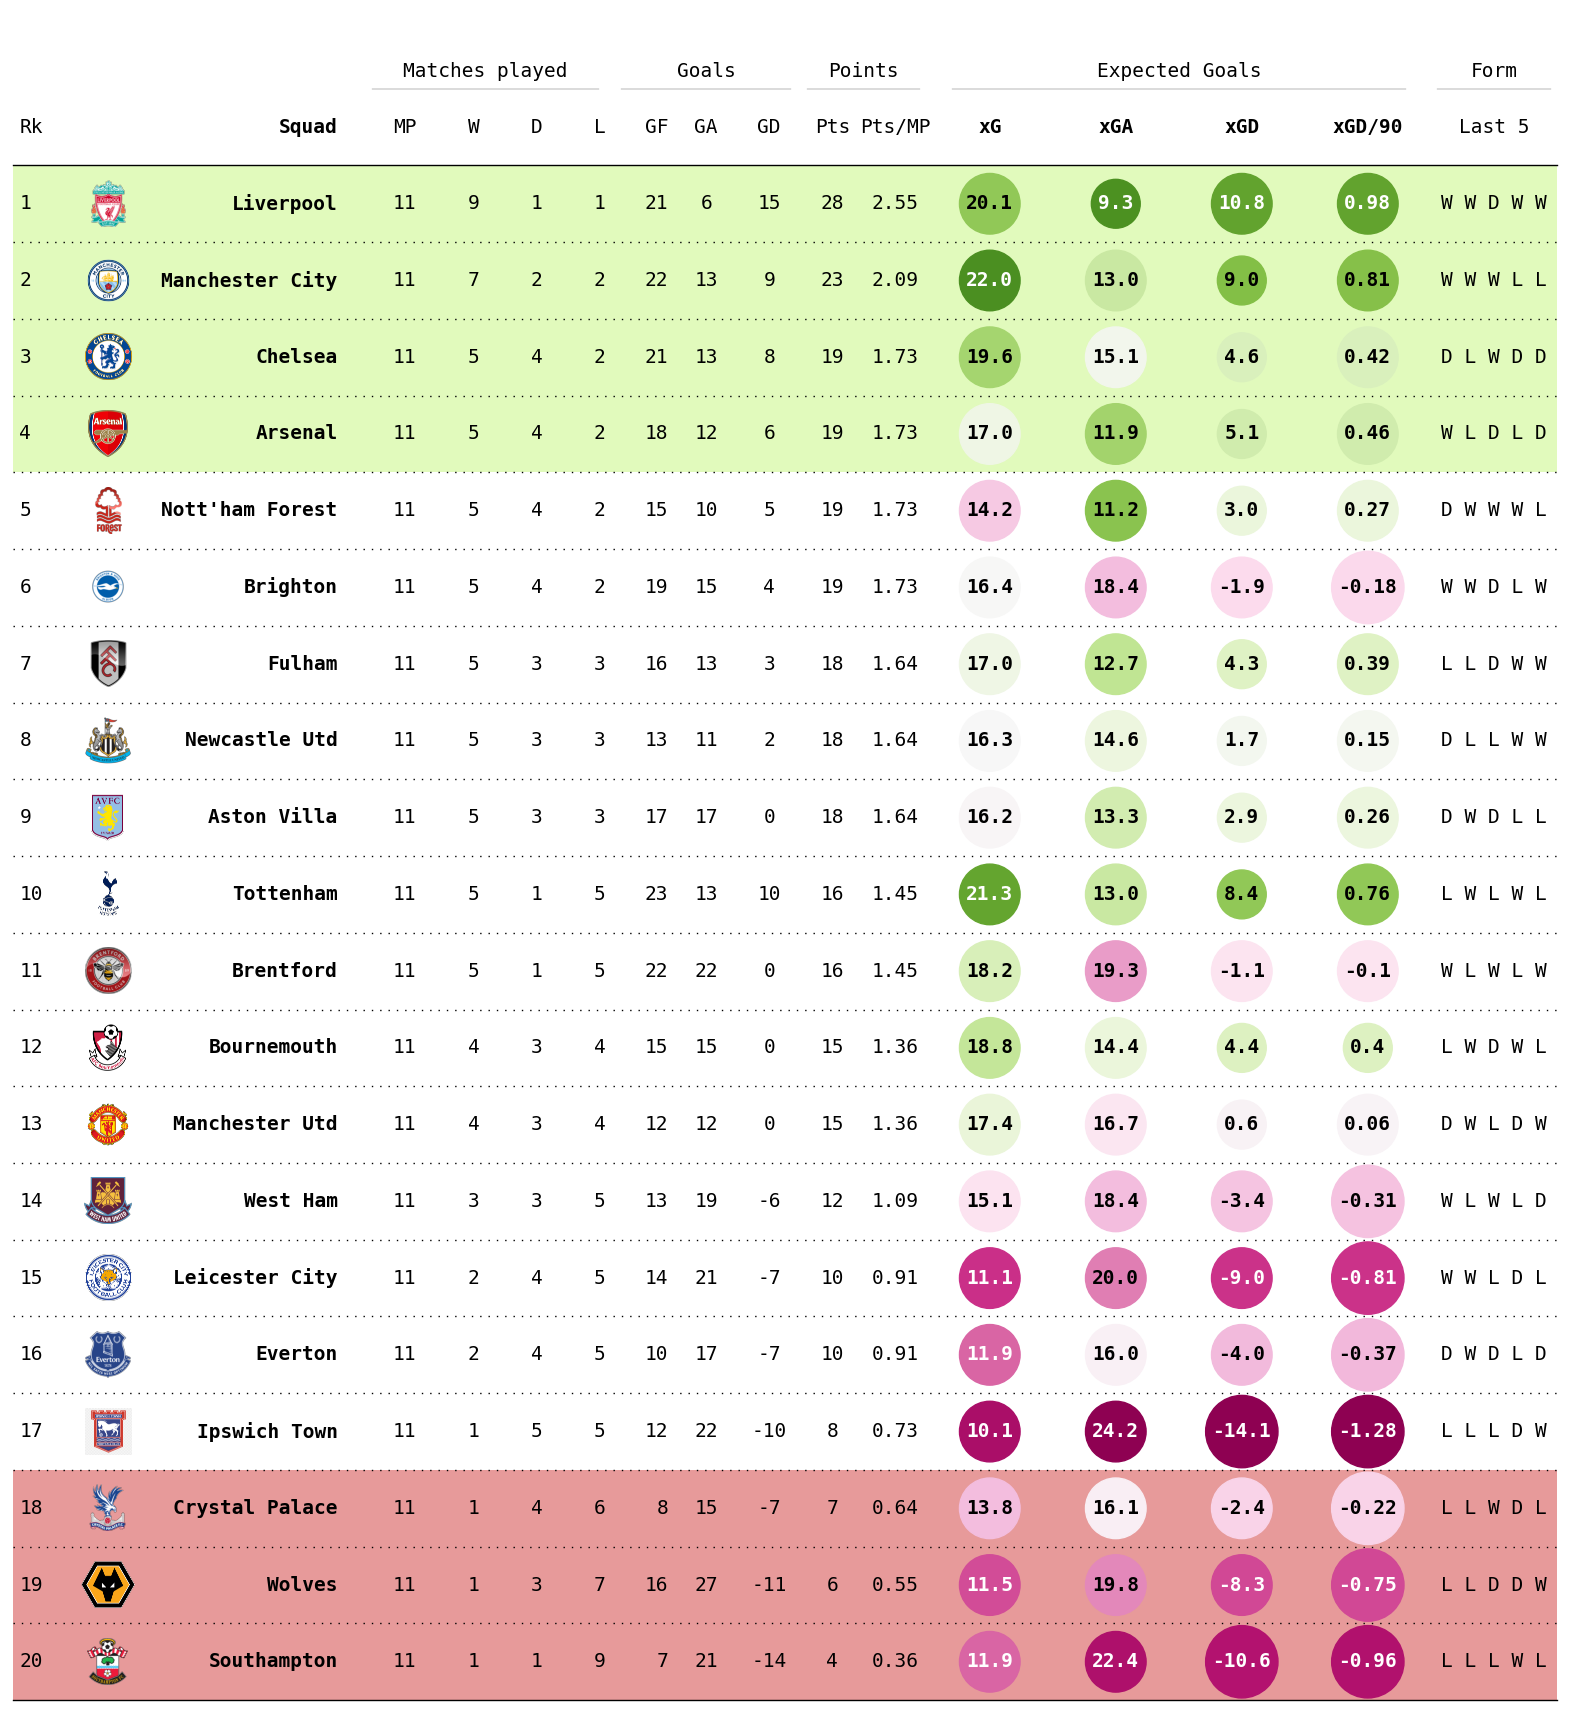

In [ ]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    shorten_table_df,
    column_definitions=cols_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(
    colnames=["xG", "xGA", "xGD", "xGD/90"]
)  # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"
# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
#
# for idx in [4, 5]:
#     table.rows[idx].set_facecolor(row_colors["top6"])
#
#
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])


fig.show()